In [1]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_dataset_car.csv'
data = pd.read_csv(file_path)

In [2]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8080 non-null   int64  
 1   selling_price  8080 non-null   float64
 2   km_driven      8080 non-null   float64
 3   fuel           8080 non-null   object 
 4   seller_type    8080 non-null   object 
 5   transmission   8080 non-null   object 
 6   owner          8080 non-null   object 
 7   mileage        8080 non-null   float64
 8   engine         8080 non-null   float64
 9   max_power      8080 non-null   float64
 10  torque         8080 non-null   float64
 11  seats          8080 non-null   int64  
 12  brand_name     8080 non-null   object 
 13  model          8080 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 883.9+ KB


In [4]:
df = data.copy()

In [5]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [6]:
current_year = pd.Timestamp.now().year

In [7]:
df['car_age'] = df['year'].apply(lambda x : current_year - x) 

In [8]:
df.drop(columns=['year'],inplace = True)

In [9]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,car_age
0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire,10
1,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid,10
2,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City,18
3,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20,14
4,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift,17


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
# Encode categorical variables
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'brand_name', 'model']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col, le in label_encoders.items():
    data[col] = le.fit_transform(data[col])

In [12]:
# Split the data into features (X) and target (y)
X = data.drop(columns=['selling_price'])
y = data['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
2887,2013,47000.0,1,1,1,0,20.30,1248.0,75.00,197.0,5,4,65
3078,2016,23700.0,3,1,1,0,20.40,1197.0,81.80,113.0,5,12,123
434,2018,50000.0,1,1,1,0,17.60,2179.0,153.86,400.0,7,17,68
3985,2016,35000.0,1,1,1,2,27.28,1047.0,69.00,140.0,5,17,129
751,2006,120000.0,1,1,1,2,10.50,2179.0,120.00,290.0,8,11,116


In [14]:
y_train.head()

2887     250000.0
3078     470000.0
434     1525000.0
3985     400000.0
751      220000.0
Name: selling_price, dtype: float64

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Train a decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [16]:
# Make predictions on the train set
y_pred_train = model.predict(X_train)

In [17]:
# Evaluate the model on trainning dataset
mse = root_mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

mse, r2 

(13321.376117569756, 0.9997155172650293)

In [18]:
residuals_train = y_train - y_pred_train

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

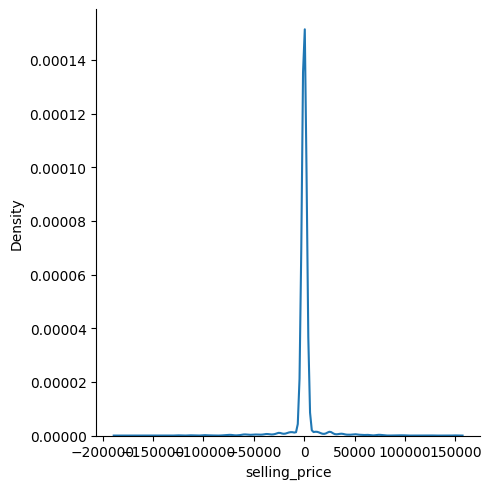

In [20]:
sns.displot(residuals_train,kind='kde')
plt.show()

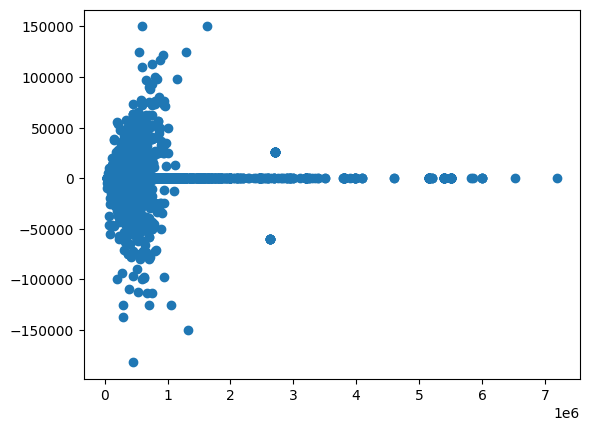

In [21]:
plt.scatter(y_train,residuals_train)
plt.show()

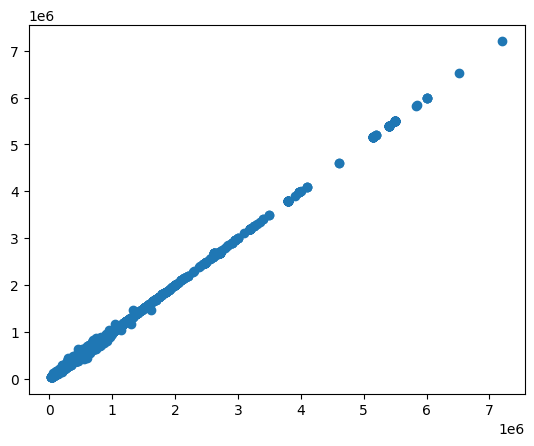

In [22]:
plt.scatter(y_train,y_pred_train)

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, r2

(166200.59545582393, 0.9585851661166584)

In [24]:
residuals = y_test - y_pred

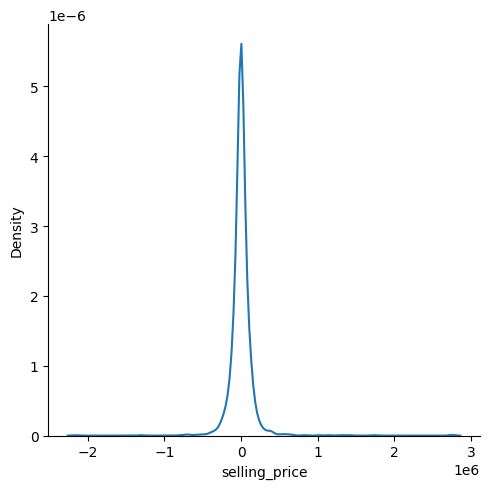

In [25]:
sns.displot(residuals,kind='kde')
plt.show()

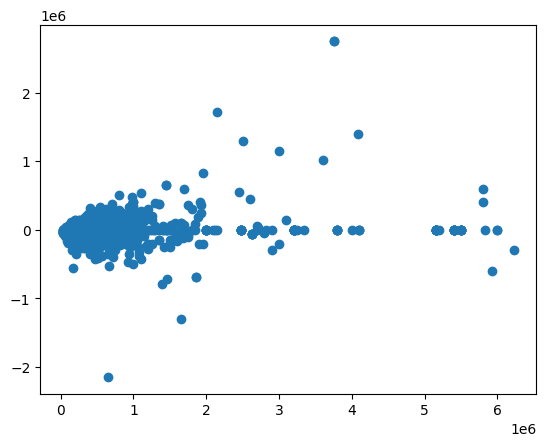

In [26]:
plt.scatter(y_test,residuals)
plt.show()

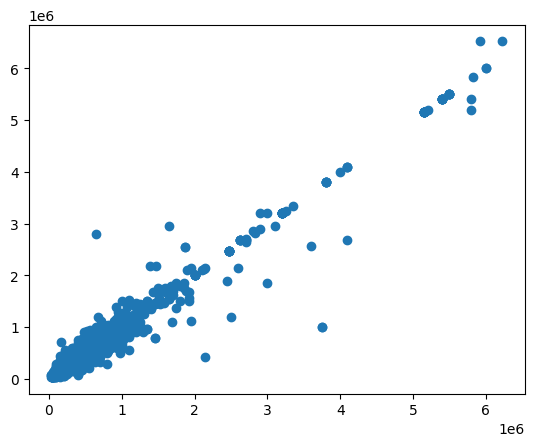

In [27]:
plt.scatter(y_test,y_pred)

In [28]:
param_grid = {
    'max_depth': [5,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2')

In [30]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params, best_score)


{'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2} 0.956871816347644


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [32]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Make predictions
y_pred_train = rf.predict(X_train)

In [35]:
# Make predictions
y_pred = rf.predict(X_test)

In [36]:
# Evaluate the model
rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [37]:
rmse_train,r2_train

(52121.68416413135, 0.9956449352712161)

In [38]:
residuals_train = y_train - y_pred_train

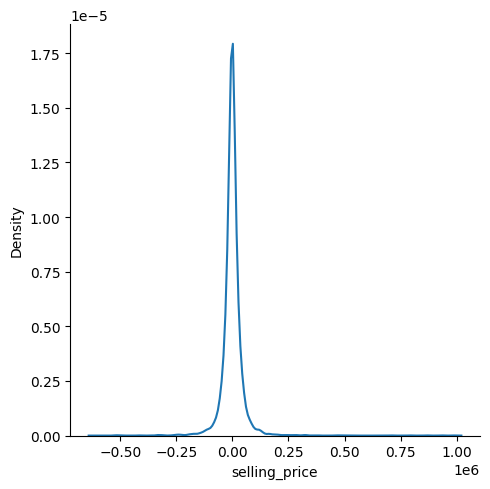

In [39]:
sns.displot(residuals_train,kind='kde')
plt.show()

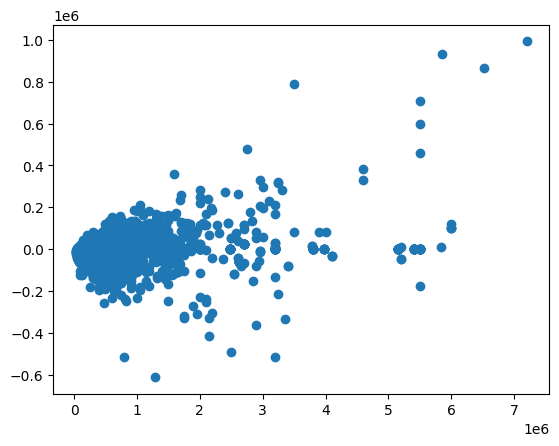

In [40]:
plt.scatter(y_train,residuals_train)
plt.show()

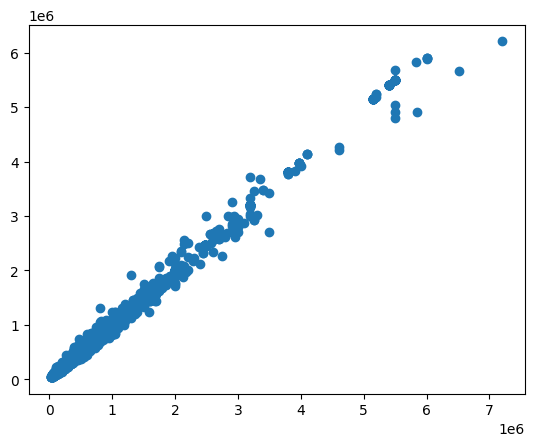

In [41]:
plt.scatter(y_train,y_pred_train)

In [42]:
# Evaluate the model
rmse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [43]:
rmse_test,r2_test

(132677.92872494823, 0.9736070376106802)

In [44]:
residuals = y_test - y_pred

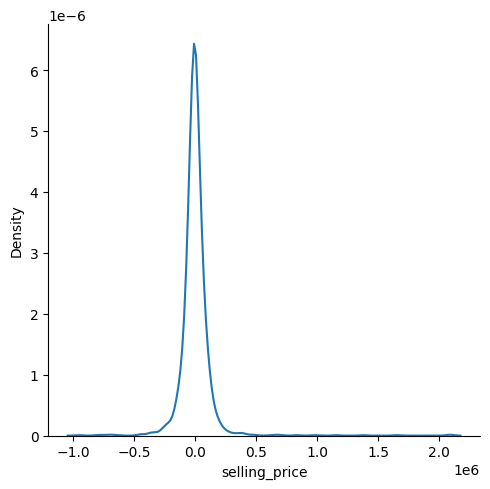

In [45]:
sns.displot(residuals,kind='kde')
plt.show()

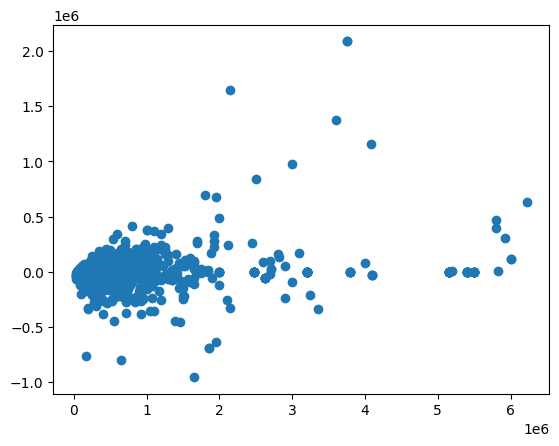

In [46]:
plt.scatter(y_test,residuals)
plt.show()

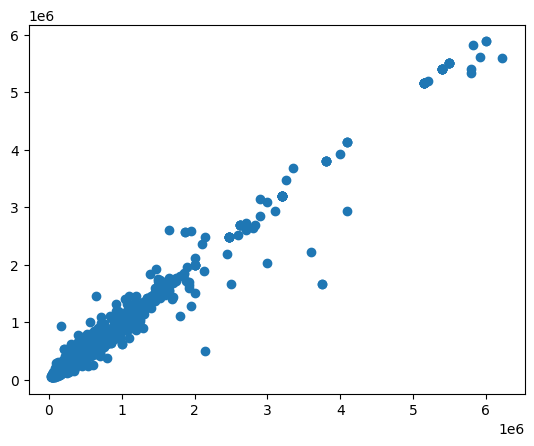

In [47]:
plt.scatter(y_test,y_pred)